### Importar librerías


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # Para cargar el dataset

### Configuración para mejorar la visualización de gráficos

In [33]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

### # Cargar el dataset de Cáncer de Mama

In [34]:
cancer = load_breast_cancer()


#### Crear un DataFrame de pandas con los datos y los nombres de las características

In [35]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [36]:
# Añadir la variable objetivo ('diagnosis') al DataFrame
# Mapeamos los valores numéricos (0 y 1) a sus etiquetas categóricas ('B' para benigno, 'M' para maligno)
df['diagnosis'] = cancer.target
df['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})

print("Dataset cargado exitosamente. Las primeras 5 filas son:")
print(df.head())

Dataset cargado exitosamente. Las primeras 5 filas son:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wors

### 2. Análisis Exploratorio de Datos (EDA)

In [37]:
print("\n--- Estadísticas Descriptivas del Dataset ---")
print(df.describe())


--- Estadísticas Descriptivas del Dataset ---
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380   

###  Análisis de Valores Nulos

In [38]:
print("\n--- Conteo de Valores Nulos por Columna ---")
print(df.isnull().sum())


--- Conteo de Valores Nulos por Columna ---
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64


### Resumen de Tipos de Datos

In [39]:
print("\n--- Resumen de Tipos de Datos y Uso de Memoria ---")
df.info()


--- Resumen de Tipos de Datos y Uso de Memoria ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569

###  Visualizaciones Clave (al menos 8)

C:\Users\franc\AppData\Local\Temp\ipykernel_16008\3090641328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


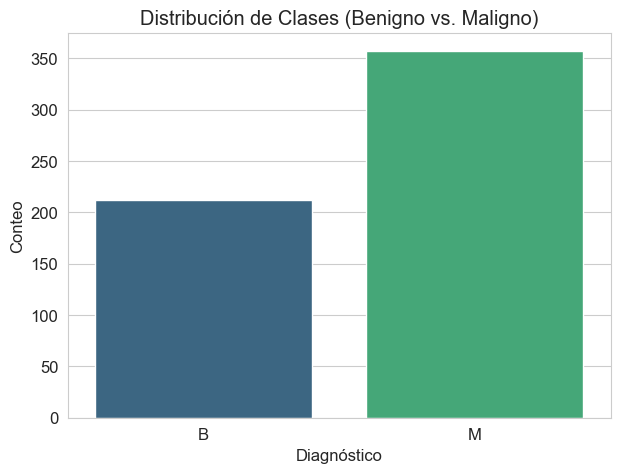

In [40]:
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribución de Clases (Benigno vs. Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Conteo')
plt.show()

### Distribuciones de Características Clave (Histogramas/KDE)

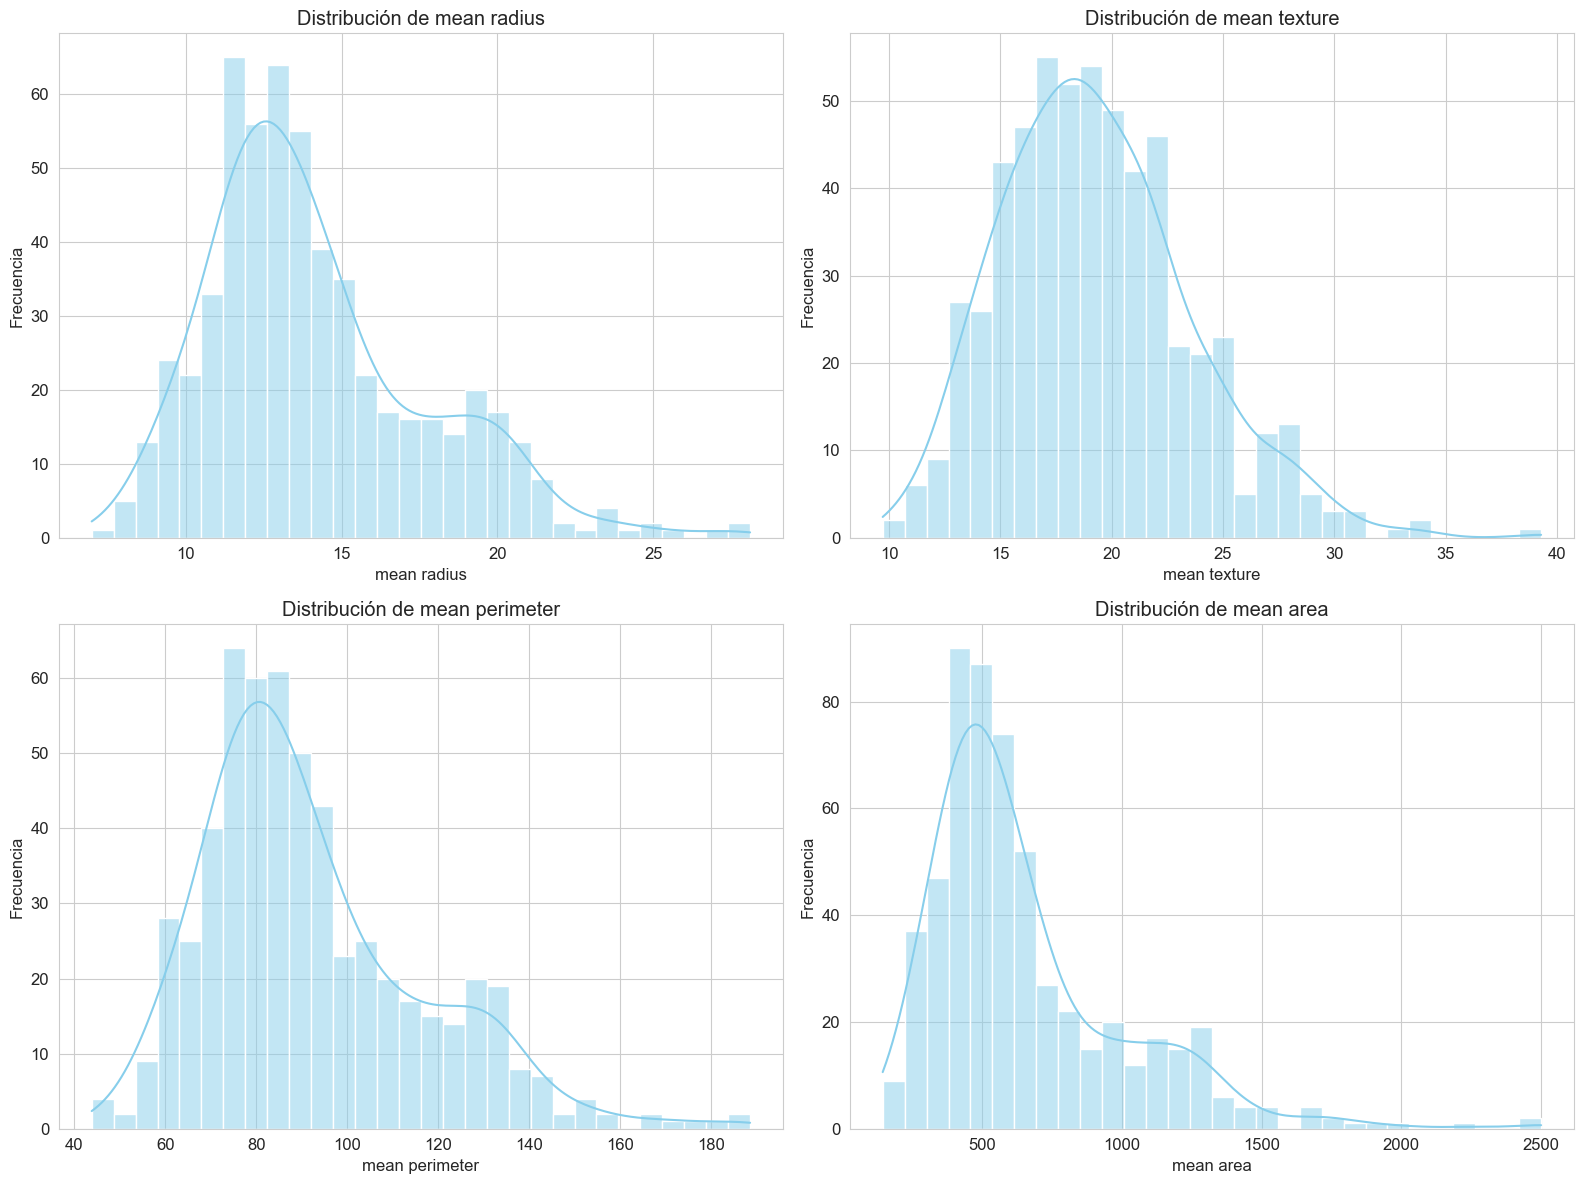

In [41]:
features_for_dist = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_for_dist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Detección de Outliers con Box Plots

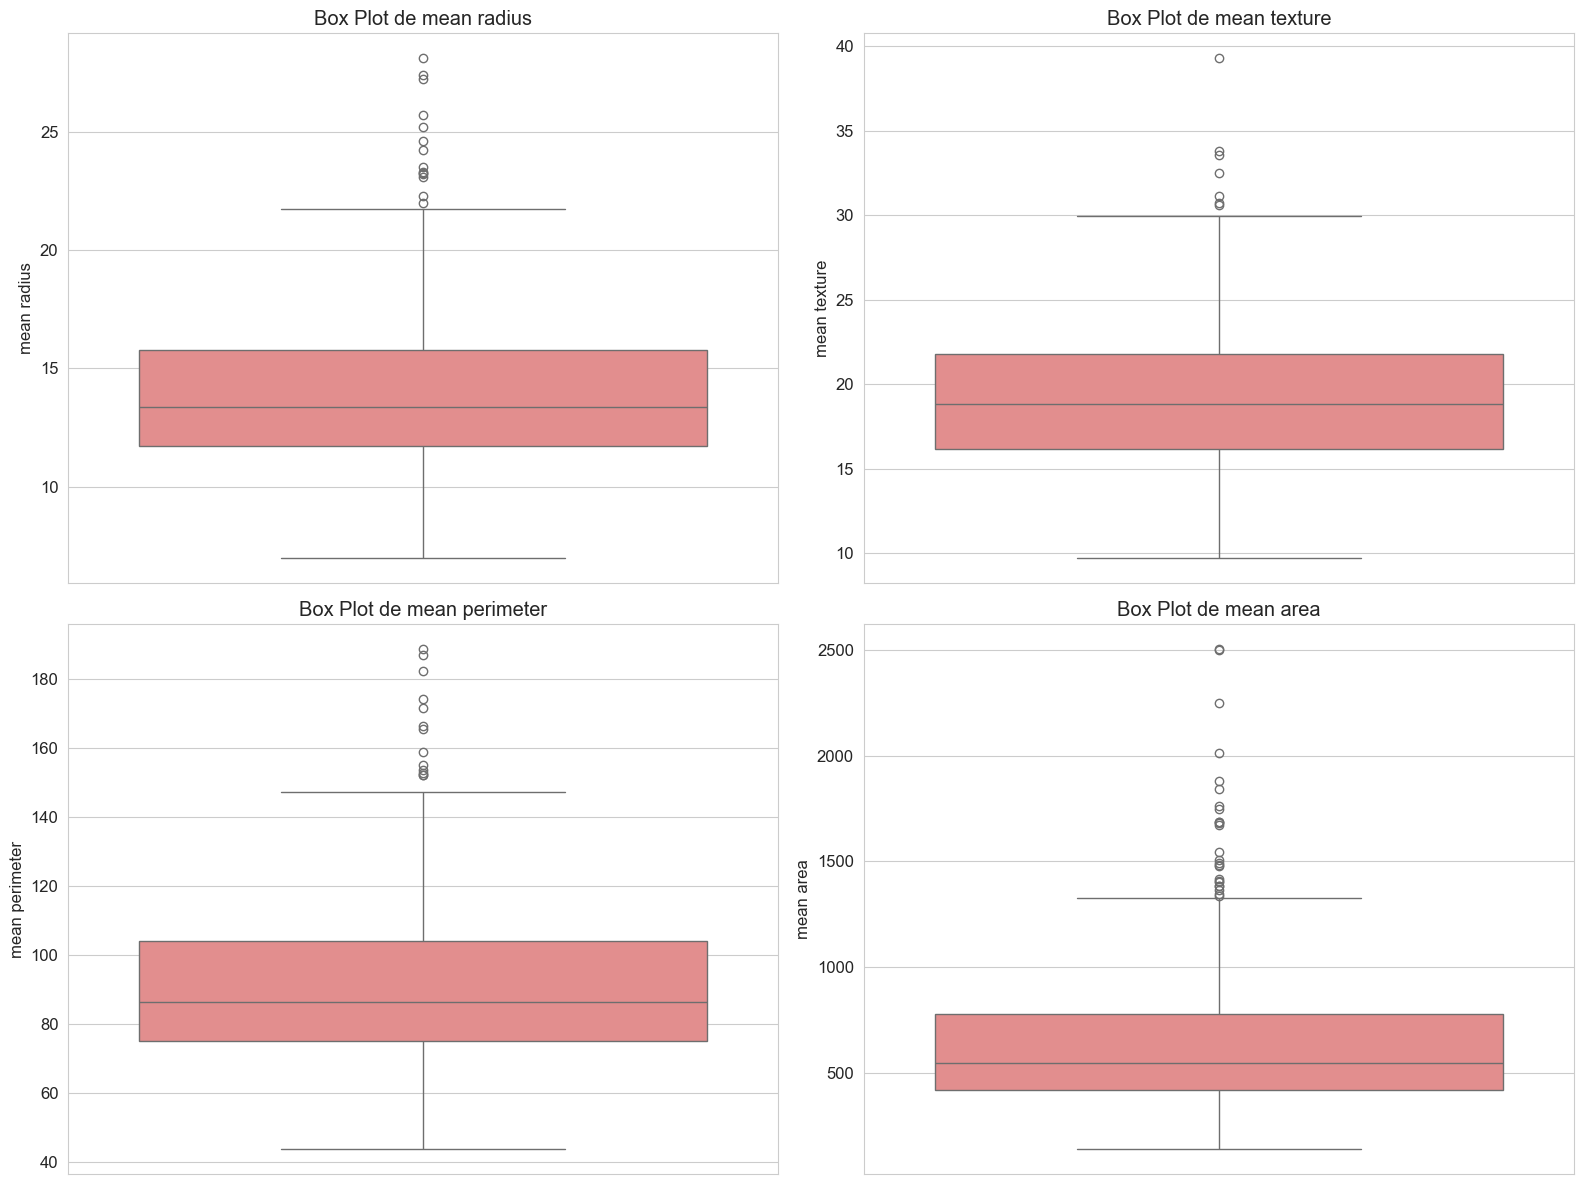

In [42]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_for_dist):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Box Plot de {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Relación entre Características y la Variable Objetivo (Violin Plots)

C:\Users\franc\AppData\Local\Temp\ipykernel_16008\1714730728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='pastel')
C:\Users\franc\AppData\Local\Temp\ipykernel_16008\1714730728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='pastel')
C:\Users\franc\AppData\Local\Temp\ipykernel_16008\1714730728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='pastel')
C:\Users\franc\AppData\Local\Temp\ipyker

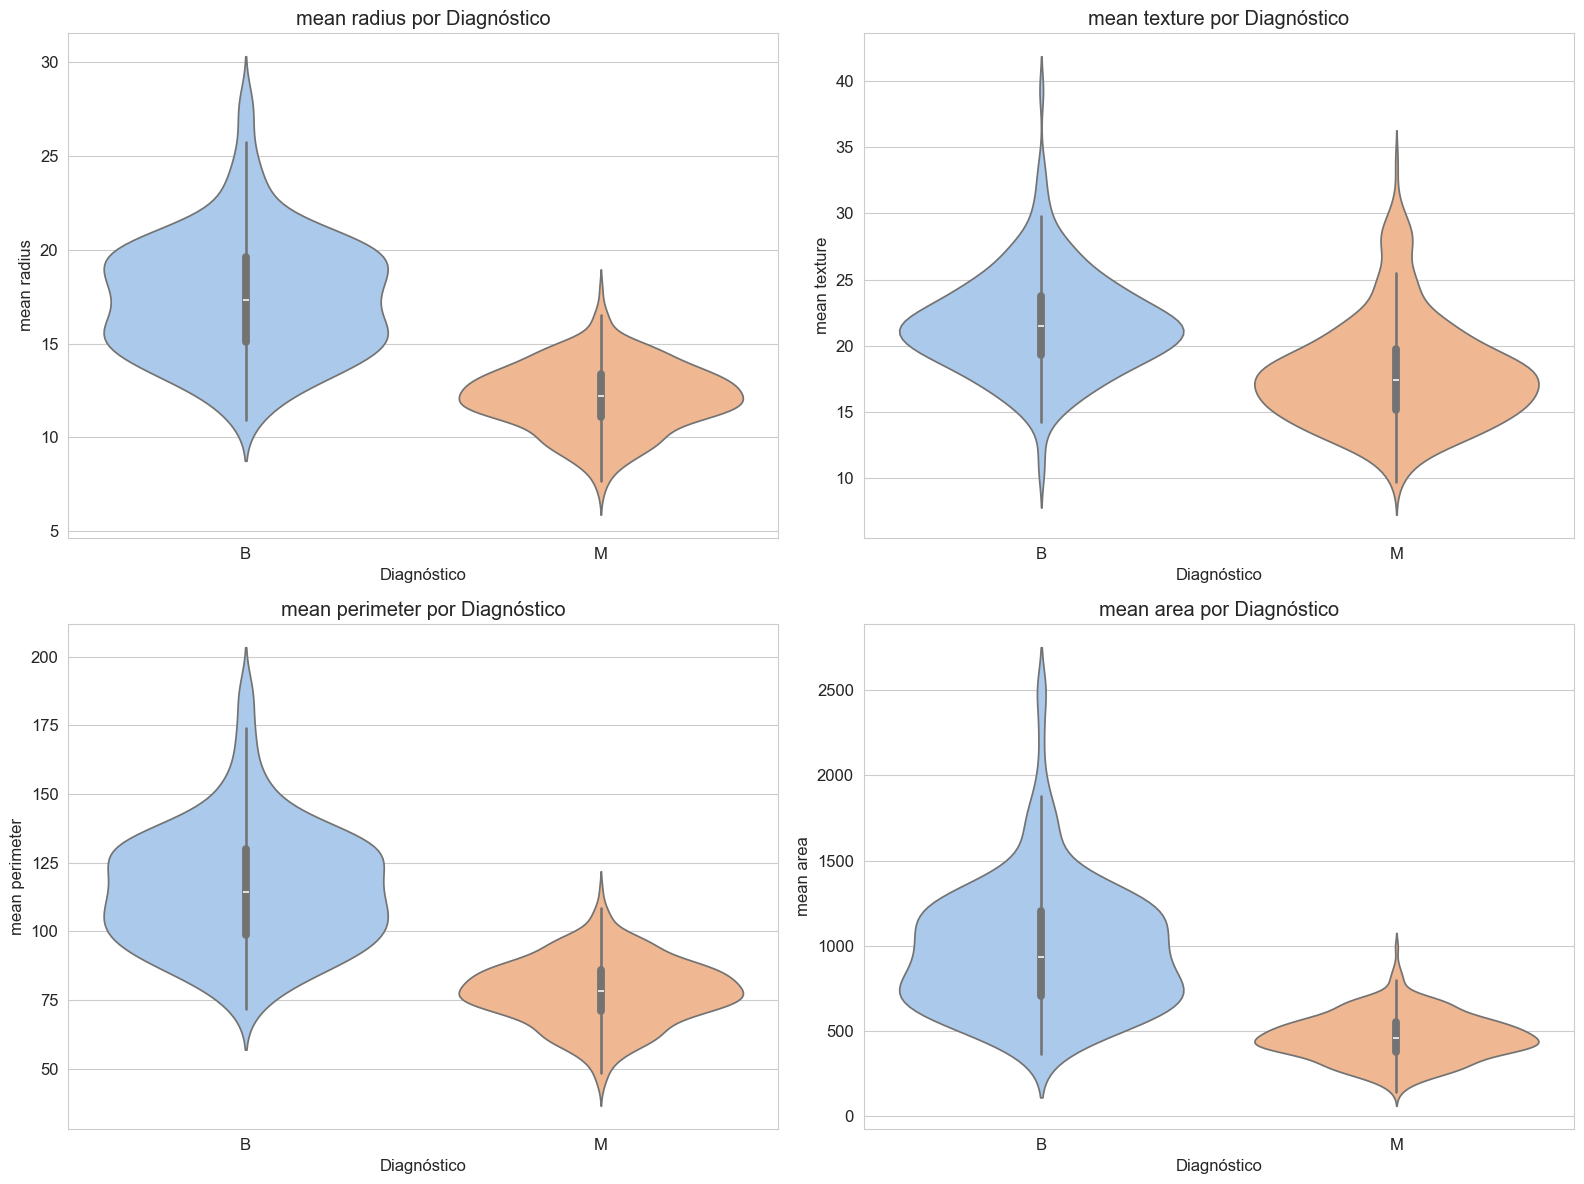

In [43]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_for_dist):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='pastel')
    plt.title(f'{feature} por Diagnóstico')
    plt.xlabel('Diagnóstico')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Matriz de Correlación (Heatmap)

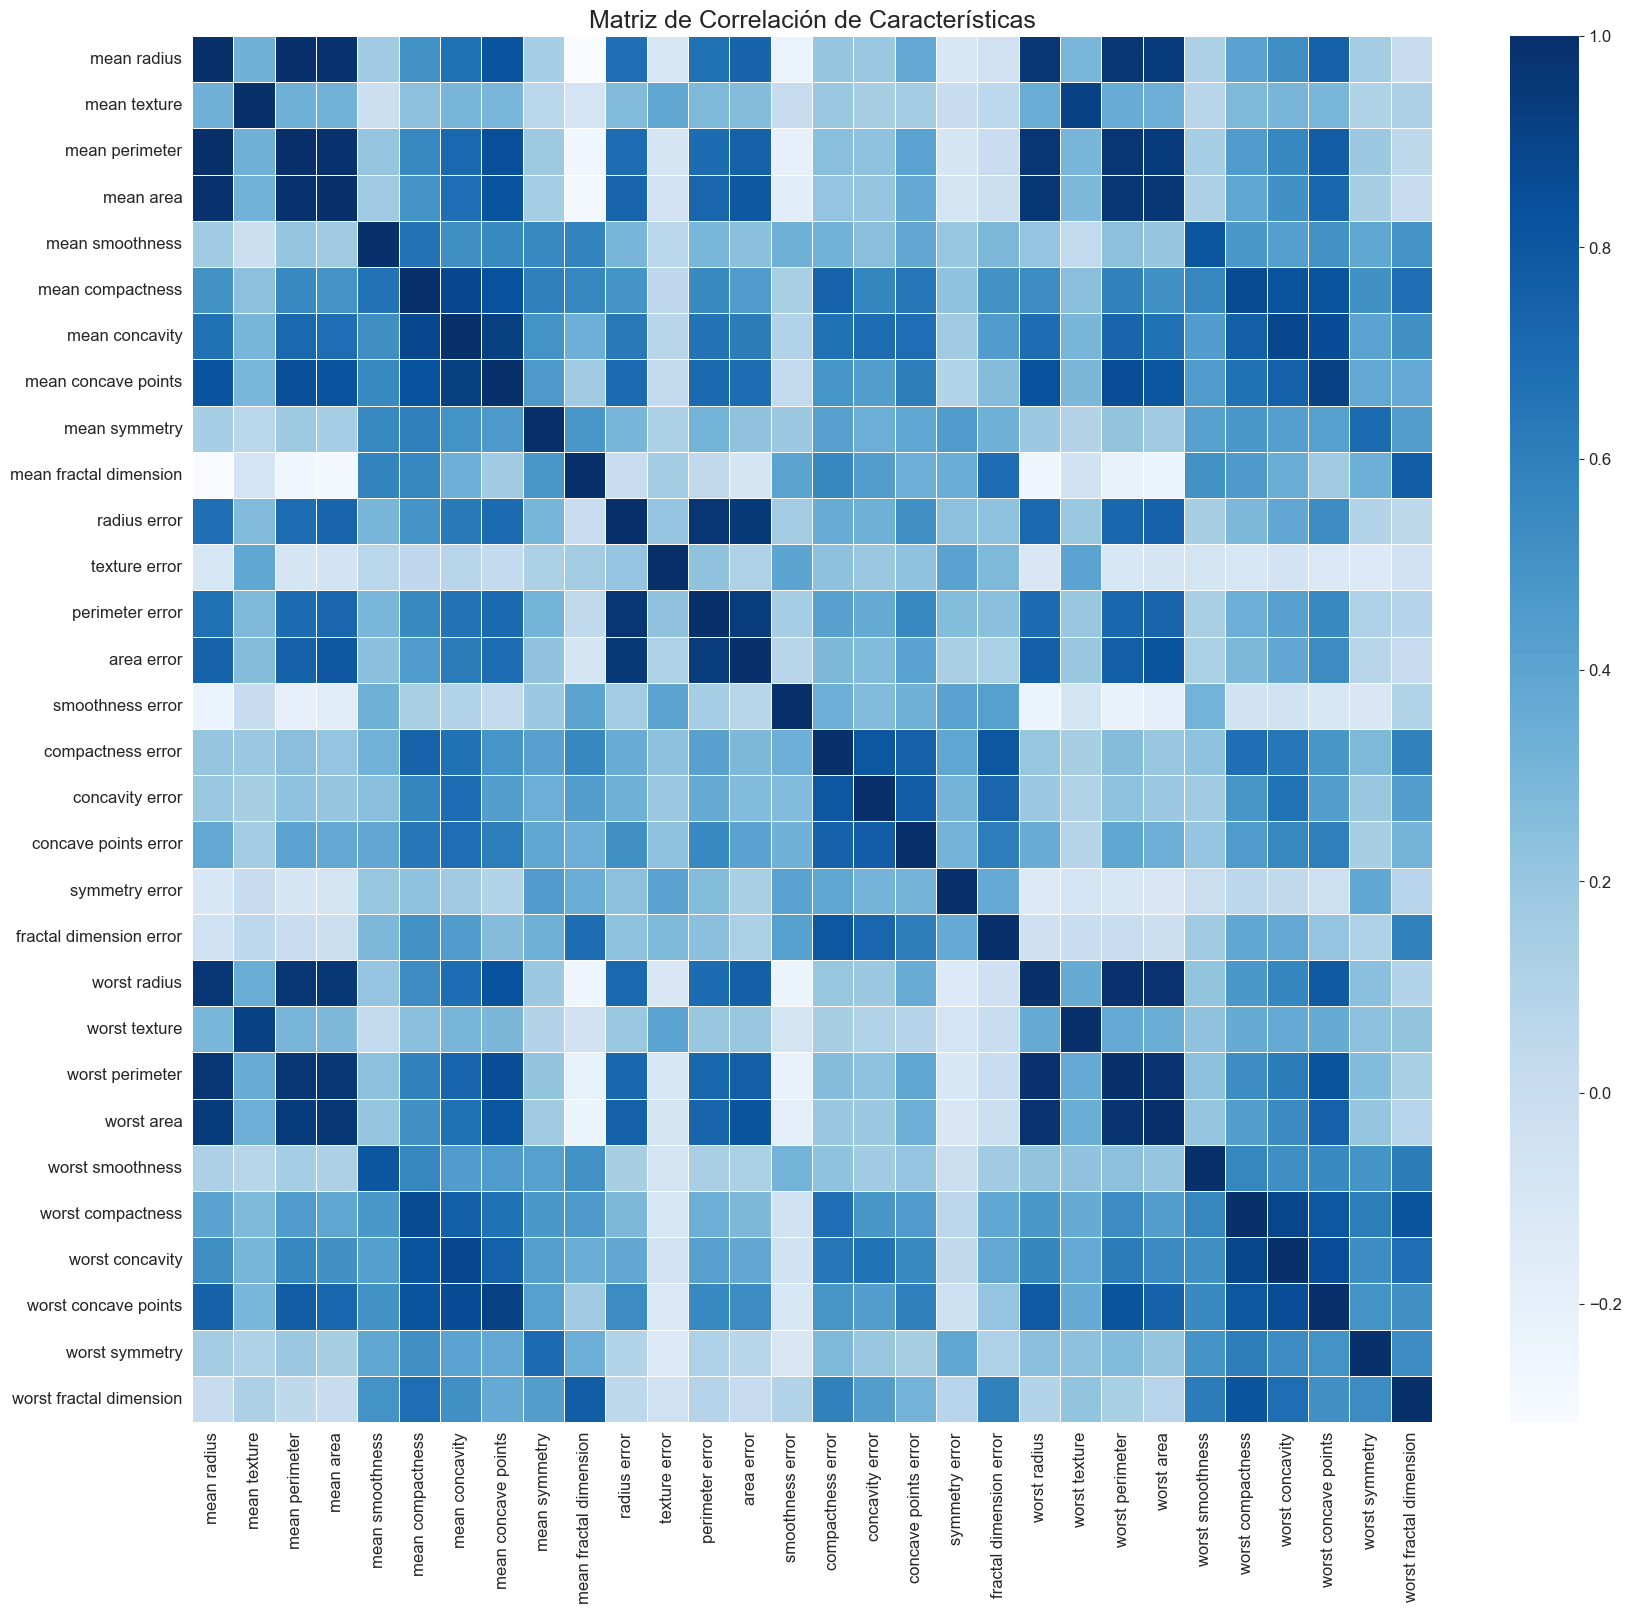

In [44]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.drop('diagnosis', axis=1).corr(), annot=False, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#  Correlación de Características con la Variable Objetivo (Bar Plot)

C:\Users\franc\AppData\Local\Temp\ipykernel_16008\2472604492.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='Blues')


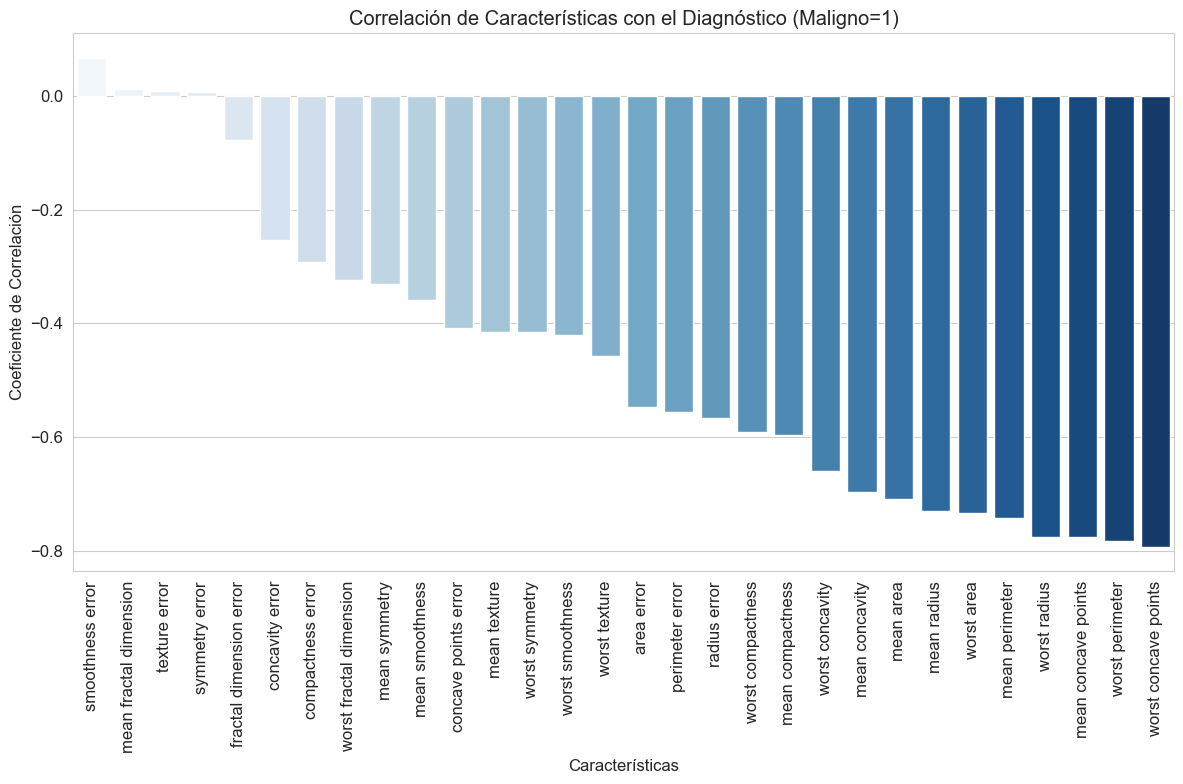

In [45]:
# Mapear 'B' y 'M' a 0 y 1 temporalmente para calcular la correlación
df_corr = df.copy()
df_corr['diagnosis_num'] = df_corr['diagnosis'].map({'B': 0, 'M': 1})

correlations = df_corr.drop(['diagnosis', 'diagnosis_num'], axis=1).corrwith(df_corr['diagnosis_num']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette='Blues')
plt.xticks(rotation=90)
plt.title('Correlación de Características con el Diagnóstico (Maligno=1)')
plt.ylabel('Coeficiente de Correlación')
plt.xlabel('Características')
plt.tight_layout()
plt.show()

# Pair Plots (Interacciones entre características seleccionadas y el objetivo)

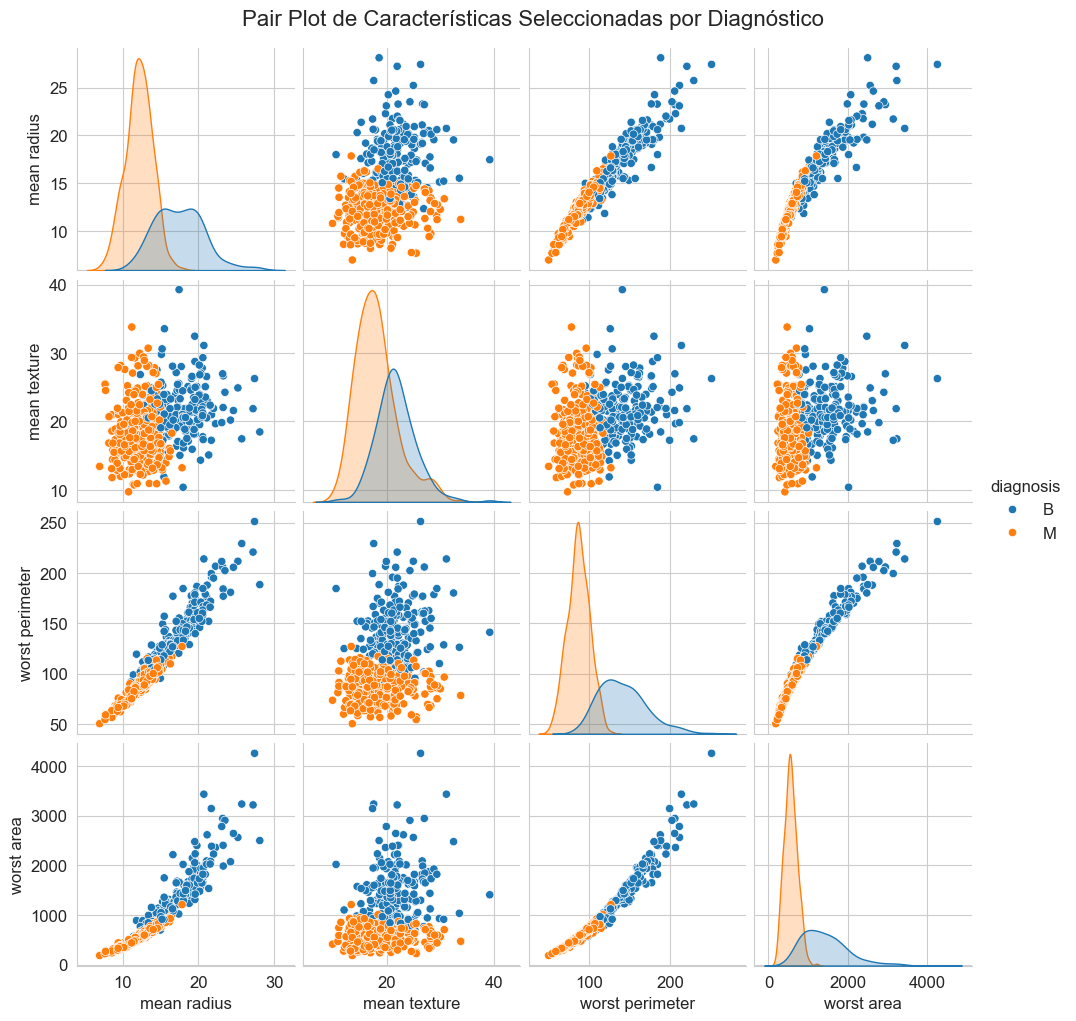

In [46]:
# Seleccionar un subconjunto de características para no saturar el gráfico
# Las características "worst" (peor) suelen ser muy importantes
selected_features_for_pairplot = ['mean radius', 'mean texture', 'worst perimeter', 'worst area', 'diagnosis']

# Limitar a un número manejable de filas si el dataset es muy grande, para la velocidad del pairplot
# sns.pairplot(df.sample(n=500, random_state=42)[selected_features_for_pairplot], hue='diagnosis', diag_kind='kde', palette='tab10')
sns.pairplot(df[selected_features_for_pairplot], hue='diagnosis', diag_kind='kde', palette='tab10')
plt.suptitle('Pair Plot de Características Seleccionadas por Diagnóstico', y=1.02, fontsize=16)
plt.show()

# Scatter Plot de dos Características Clave con el Diagnóstico

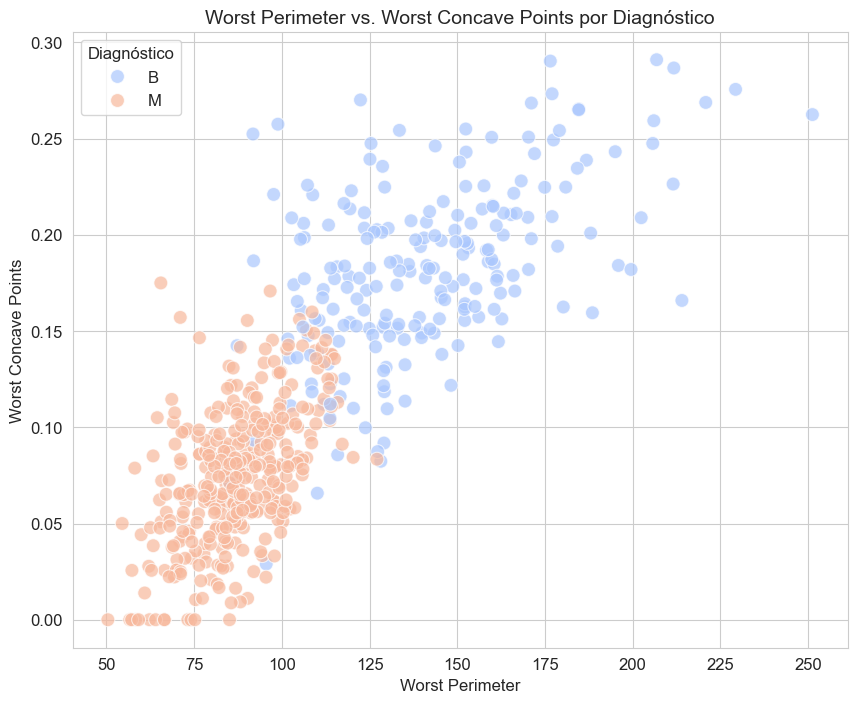

In [47]:
# Basándonos en la correlación, 'worst perimeter' y 'worst concave points' son muy predictivas
plt.figure(figsize=(10, 8))
sns.scatterplot(x='worst perimeter', y='worst concave points', hue='diagnosis', data=df, alpha=0.7, s=100, palette='coolwarm')
plt.title('Worst Perimeter vs. Worst Concave Points por Diagnóstico', fontsize=14)
plt.xlabel('Worst Perimeter')
plt.ylabel('Worst Concave Points')
plt.legend(title='Diagnóstico')
plt.show()

### Feature Transformation

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Decision Tree Modeling

Decision Tree Performance:
              precision    recall  f1-score   support

           B       0.91      0.91      0.91        64
           M       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

Accuracy: 0.9298245614035088


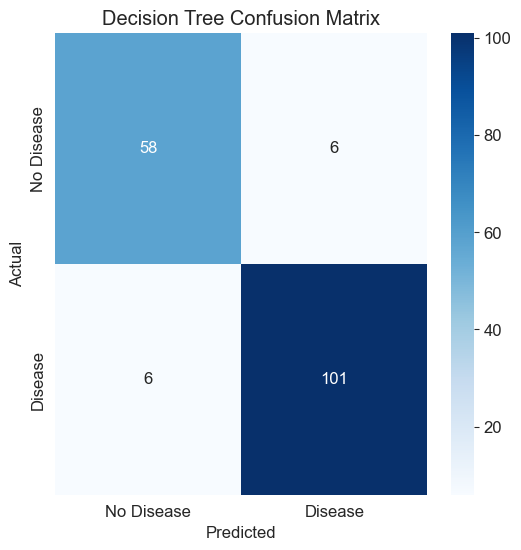

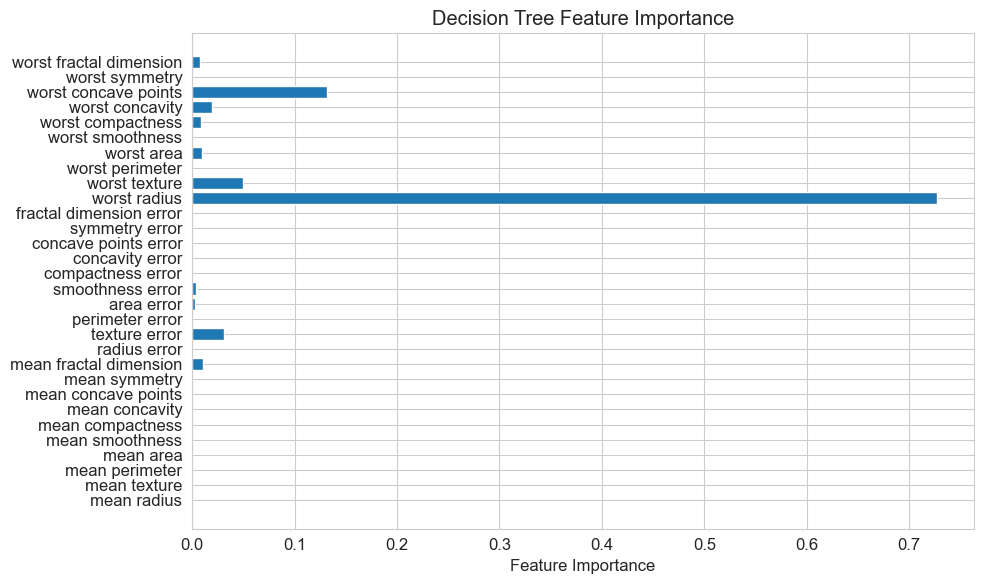

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_transformed, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_transformed)

# Evaluation
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
dt_importances = dt_model.feature_importances_

# Obtener nombres de columnas (seguro)
feature_names = numeric_features.copy()
if categorical_features:
    onehot_encoder = preprocessor.named_transformers_['cat']['onehot']
    feature_names += list(onehot_encoder.get_feature_names_out(categorical_features))

# Graficar importancia
plt.figure(figsize=(10, 6))
plt.barh(range(len(dt_importances)), dt_importances, align='center')
plt.yticks(range(len(dt_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()


# Random Forest Modeling


Random Forest Performance:
              precision    recall  f1-score   support

           B       0.94      0.91      0.92        64
           M       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 0.9415204678362573


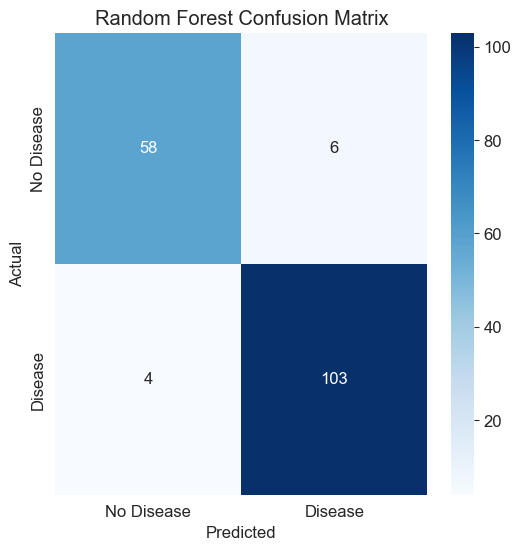

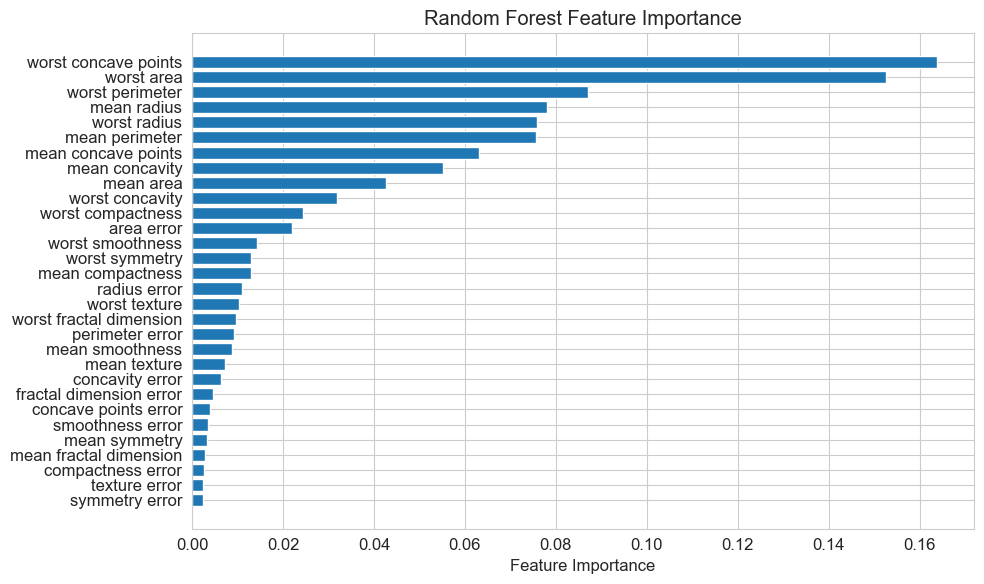

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train_transformed, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluation
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
rf_importances = rf_model.feature_importances_
sorted_idx = rf_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), rf_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Logistic Regression

=== Logistic Regression Performance ===
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        64
           M       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy: 0.9883040935672515


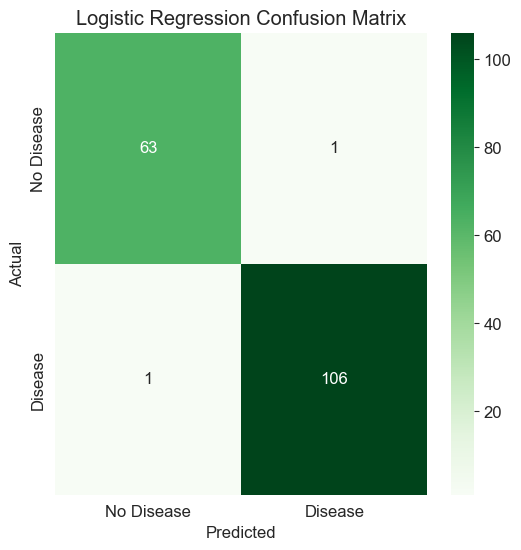

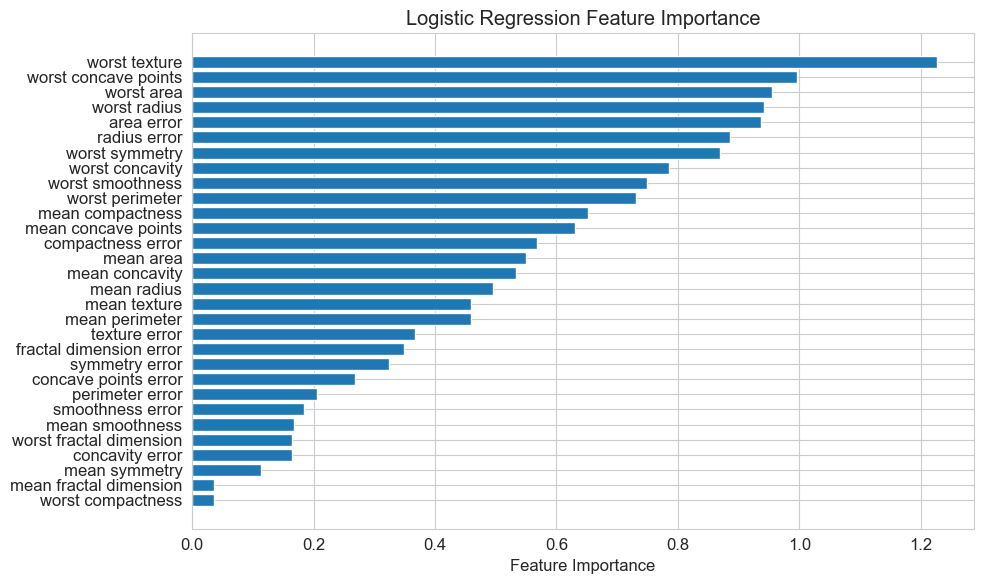

In [51]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_transformed, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluation
print("=== Logistic Regression Performance ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
lr_importances = np.abs(lr_model.coef_[0])
sorted_idx = lr_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), lr_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

# Decision Tree parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

#Logistic Regression parameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Decision Tree tuning
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid=dt_param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
dt_grid.fit(X_train_transformed, y_train)

# Random Forest tuning
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=rf_param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
rf_grid.fit(X_train_transformed, y_train)

# Logistic Regression tuning
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                      param_grid=lr_param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
lr_grid.fit(X_train_transformed, y_train)

# Best parameters
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree Accuracy:", dt_grid.best_score_)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

print("\nBest Logistic Regression Parameters:", lr_grid.best_params_)
print("Best Logistic Regression Accuracy:", lr_grid.best_score_)

# Evaluate best models
best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_lr = lr_grid.best_estimator_

y_pred_best_dt = best_dt.predict(X_test_transformed)
y_pred_best_rf = best_rf.predict(X_test_transformed)
y_pred_best_lr = best_lr.predict(X_test_transformed)

print("\nOptimized Decision Tree Performance:")
print(classification_report(y_test, y_pred_best_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))

print("\nOptimized Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))

print("\nOptimized Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_best_lr))

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.9449367088607594

Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9725000000000001

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9799367088607595

Optimized Decision Tree Performance:
              precision    recall  f1-score   support

           B       0.92      0.88      0.90        64
           M       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

Accuracy: 0.9239766081871345

Optimized Random Forest Performance:
              precision    recall  f1-score   support

           B       0.94      0.91      0.9

# Model Comparison

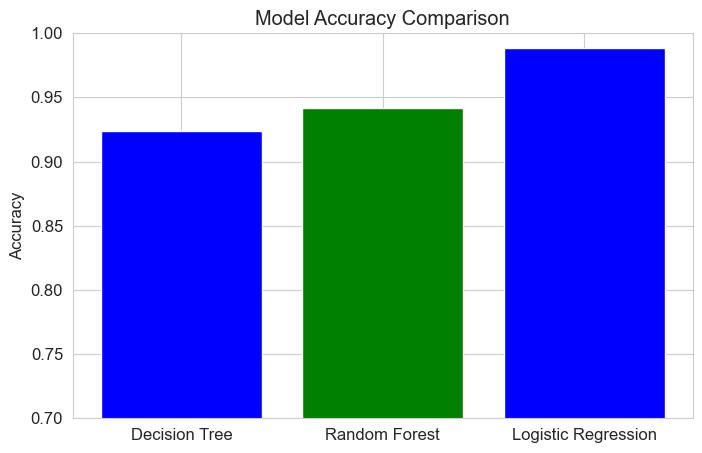


Top 5 Features - Decision Tree:
area error: 0.0026
worst radius: 0.7270
worst area: 0.0094
worst concave points: 0.1314
worst texture: 0.0501

Top 5 Features - Random Forest:
area error: 0.0220
worst radius: 0.0758
worst area: 0.1525
worst concave points: 0.1638
worst texture: 0.0102

Top 5 Features - Logistic Regression:
area error: 0.9375
worst radius: 0.9411
worst area: 0.9550
worst concave points: 0.9968
worst texture: 1.2263


In [53]:
# Compare model performances
models = {
    'Decision Tree': accuracy_score(y_test, y_pred_best_dt),
    'Random Forest': accuracy_score(y_test, y_pred_best_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_best_lr),
}

plt.figure(figsize=(8, 5))
plt.bar(models.keys(), models.values(), color=['blue', 'green'])
plt.ylim(0.7, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Print feature importance comparison
print("\nTop 5 Features - Decision Tree:")
for i in sorted_idx[-5:]:
    print(f"{feature_names[i]}: {dt_importances[i]:.4f}")

print("\nTop 5 Features - Random Forest:")
for i in sorted_idx[-5:]:
    print(f"{feature_names[i]}: {rf_importances[i]:.4f}")

print("\nTop 5 Features - Logistic Regression:")
for i in sorted_idx[-5:]:
    print(f"{feature_names[i]}: {lr_importances[i]:.4f}")